<a href="https://colab.research.google.com/github/kartikshastrakar/kartik/blob/main/Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!wget https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv

--2022-02-04 15:12:32--  https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/18vhxydhoe3g84n/creditcard%202.csv [following]
--2022-02-04 15:12:33--  https://www.dropbox.com/s/raw/18vhxydhoe3g84n/creditcard%202.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca84e64849ba0d365c45b6a13f9.dl.dropboxusercontent.com/cd/0/inline/BfEpphR1yW_EMu44jNt_Askuq43RLPChh-qOzbqbHbN903dd3glGV4AUdZ4dU--Wi_eaAwp2iXoFBqpuYPdMFUrE53aR_ucq4aS5P4pG7hPBuIxUfcjh_5WmgfjGY6P0DqHnjN3MavJpIGUH4DJ_XOPJ/file# [following]
--2022-02-04 15:12:34--  https://uca84e64849ba0d365c45b6a13f9.dl.dropboxusercontent.com/cd/0/inline/BfEpphR1yW_EMu44jNt_Askuq43RLPChh-qOzbqbHbN903dd3glGV4AUdZ4dU--Wi_eaA

In [13]:
from zipfile import ZipFile

file_name = "/content/creditcard.csv.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [16]:
data_df=pd.read_csv('/content/creditcard.csv')

In [15]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
data_df.shape

(284807, 31)

In [18]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [19]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [21]:
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No. Null values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [22]:
null_columns

,Columns,No. Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [23]:
data_df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

### <b> Percentage of total not fraud transaction

In [27]:
fcount=0
Fraud=data_df['Class']
for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount=fcount+1

fcount    
per_f=(fcount/len(Fraud))*100
print('percentage of total fraud transaction in the dataset: ',per_f)


percentage of total fraud transaction in the dataset:  0.1727485630620034


In [24]:
nfcount=0
notFraud=data_df['Class']
for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1

nfcount    
per_nf=(nfcount/len(notFraud))*100
print('percentage of total not fraud transaction in the dataset: ',per_nf)

percentage of total not fraud transaction in the dataset:  99.82725143693798


In [28]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=Fraud
plot_data['Genuine Transaction']=notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


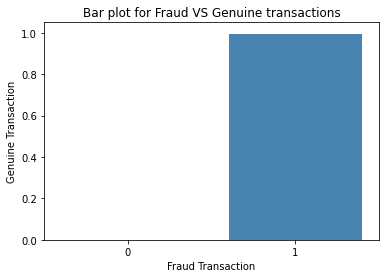

In [29]:
plt.title("Bar plot for Fraud VS Genuine transactions")
sns.barplot(x = 'Fraud Transaction', y = 'Genuine Transaction', data = plot_data, palette = 'Blues', edgecolor = 'w')

As per the graph we can say the ratio of genuine transactions are higher than fraud transactions.


Text(0.5, 1.0, 'Time Vs amount')

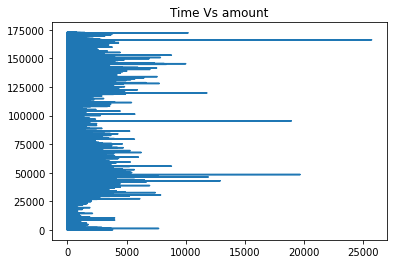

In [30]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x, y) 
plt.title('Time Vs amount') 
#sns.barplot(x = x, y = y, data = data, palette = 'Blues', edgecolor = 'w')

In this graph we try to plot the relation between Time and the amount.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


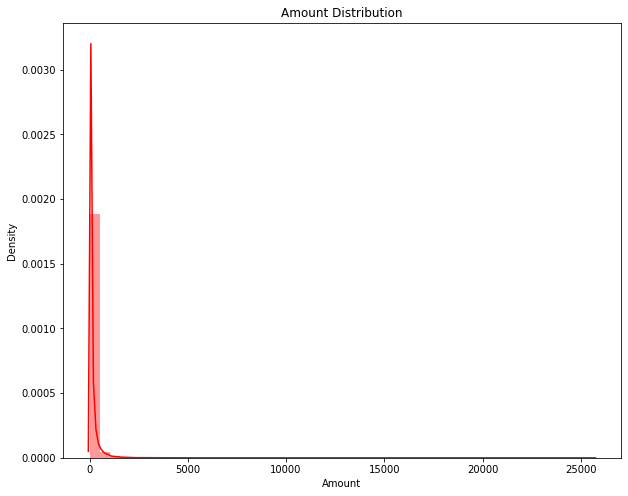

In [31]:
plt.figure(figsize=(10,8), )
plt.title('Amount Distribution')

sns.distplot(data_df['Amount'],color='red');

From this amount distribution curve  it is shown that the number high amount transactions are very low. So there is a high probability for huge transactions to be fraudulent .

**Outliers**

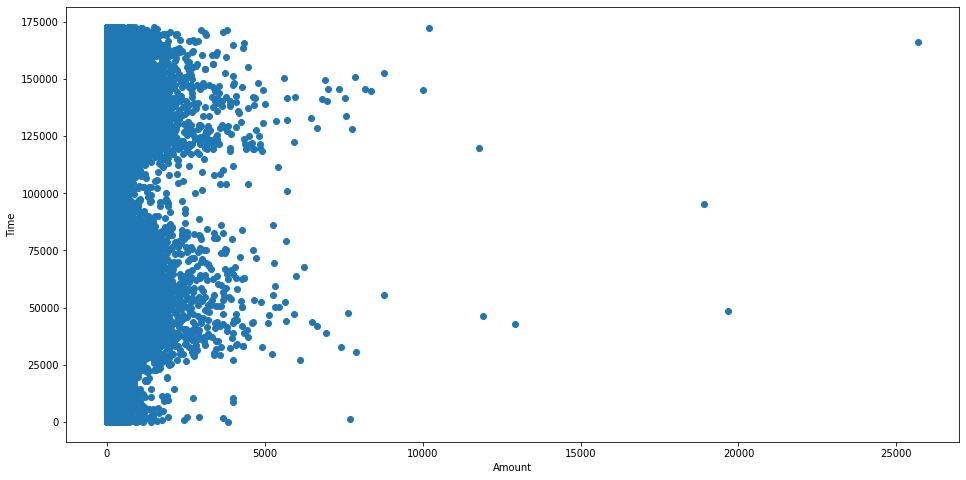

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'], data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

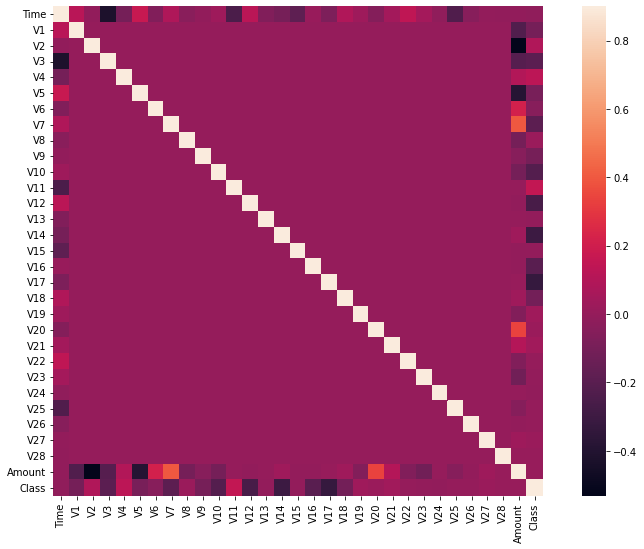

In [33]:
# Correlation matrix 
correlation_metrics = data_df.corr() 
fig = plt.figure(figsize = (14, 9)) 
sns.heatmap(correlation_metrics, vmax = .9, square = True) 
plt.show() 

Correlation metrics help us to understand the core relation between two attributes.

<b>To start with modelling First we need to split the dataset<br>
80% → 80% of the data will use to train the model<br>
20% → 20% to validate the model<br>

In [34]:
x=data_df.drop(['Class'], axis = 1)#drop the target variable
y=data_df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [35]:
logisticreg = LogisticRegression()
logisticreg.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [36]:
y_pred = logisticreg.predict(xtest)
accuracy= logisticreg.score(xtest,ytest)

### <B> Confusion Matrix</b>
-- Positive (P) : Observation is positive (for example: The transaction genuine).<br>
-- Negative (N) : Observation is not positive (for example:The transaction is not genuine).<br>
-- True Positive (TP) : Observation is positive, and is predicted to be positive.<br>
-- False Negative (FN) : Observation is positive, but is predicted negative.<br>
-- True Negative (TN) : Observation is negative, and is predicted to be negative.<br>
-- False Positive (FP) : Observation is negative, but is predicted positive.<br>


<a href="https://imgbb.com/"><img src="https://i.ibb.co/41Vjvvh/Confusion-Matrix1-1.png" alt="Confusion-Matrix1-1" border="0"></a><br /><a target='_blank' href='https://poetandpoem.com/Richard-Brautigan/poems'></a><br />

<a href="https://imgbb.com/"><img src="https://i.ibb.co/MnfKcWZ/Confusion-Matrix2-2.png" alt="Confusion-Matrix2-2" border="0"></a><br /><a target='_blank' href='https://poetandpoem.com/pain'></a><br />

In [37]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[56831    33]
 [   42    56]]


### <b>Accuracy calculation

In [38]:
print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')

Accuracy score of the Logistic regression model:  99.86833327481479 %
